In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### 데이터 분포 확인

##### 데이터 불러오기

In [56]:
train = pd.read_csv('/content/drive/MyDrive/dacon/집값예측경진대회/train.csv', sep=',', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/dacon/집값예측경진대회/test.csv', sep=',', encoding='cp949')

##### 결측치 확인

In [4]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


id                0
Overall Qual      0
Gr Liv Area       0
Exter Qual        0
Garage Cars       0
Garage Area       0
Kitchen Qual      0
Total Bsmt SF     0
1st Flr SF        0
Bsmt Qual         0
Full Bath         0
Year Built        0
Year Remod/Add    0
Garage Yr Blt     0
target            0
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


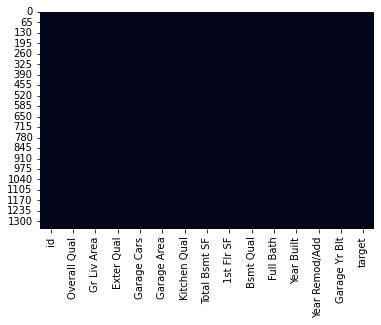

In [5]:
print(train.isna().sum())
print(sns.heatmap(train.isna(),cbar=False))

##### 데이터 describe

In [6]:
train.describe()

,id,Overall Qual,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,675.500000,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,389.855743,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,1.000000,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,338.250000,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,675.500000,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,1012.750000,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,1350.000000,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [7]:
train.dtypes

id                 int64
Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

- Year Built : 완공 연도
- Year Remod/Add : 리모델링 연도
- Garage Yr Blt : 차고 완공 연도
- Overall Qual : 전반적 재료와 마감 품질
- Exter Qual : 외관 재료 품질
- Bsmt Qual : 지하실 높이
- Kitchen Qual : 부엌 품질
- Gr Liv Area : 지상층 생활 면적
- Total Bsmt SF : 지하실 면적
- 1st Fls SF : 1층 면적
- Garage Area : 차고 면적
- Full Bath : 지하층 화장실 갯수
- Garage Cars : 차고 자리 개수

In [57]:
numeric_feature = train.columns[(train.dtypes==int) | (train.dtypes== float)]
categorical_feature = train.columns[train.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['id', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'target']
카테고리형 데이터는 다음과 같습니다. 
 ['Exter Qual', 'Kitchen Qual', 'Bsmt Qual']


##### IQR Box Plot

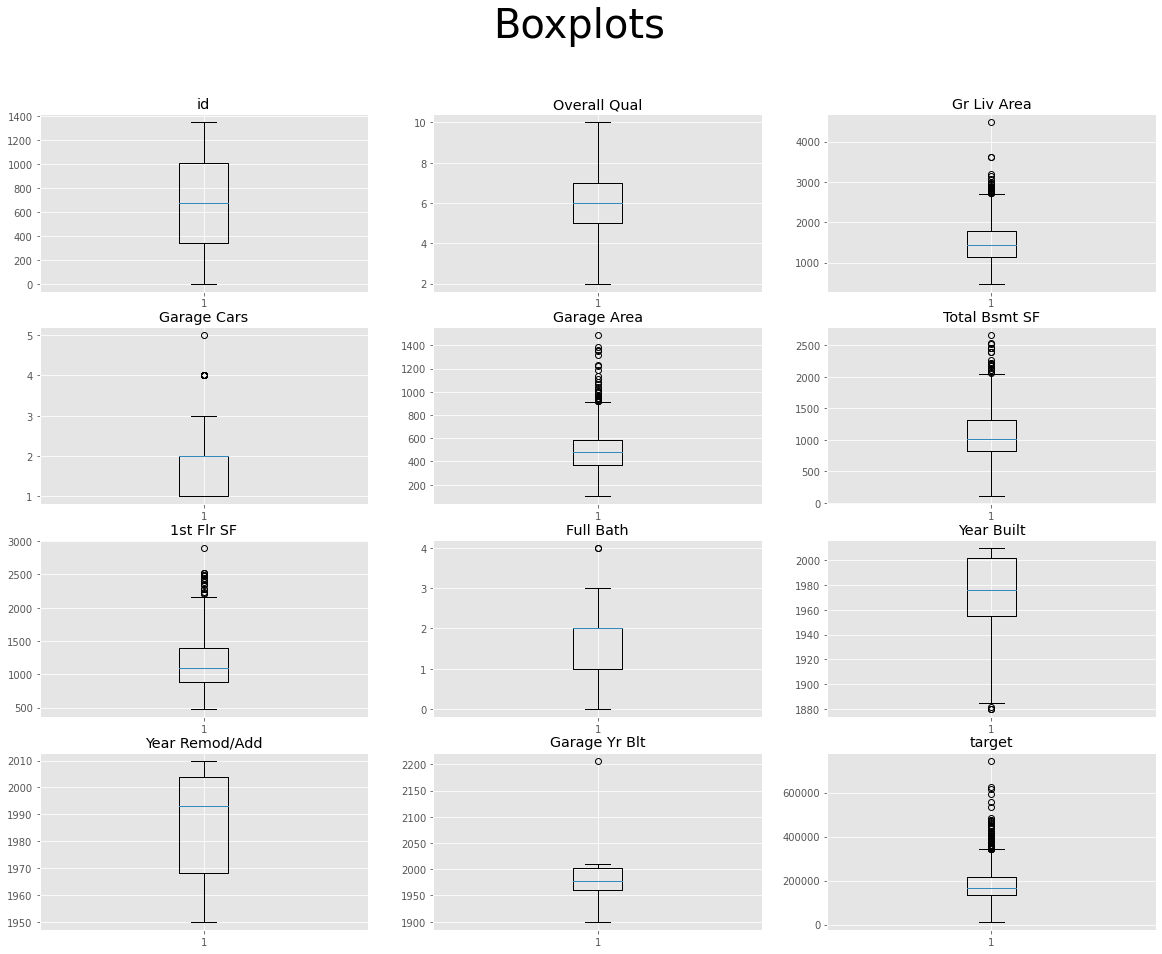

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(4,3,i+1)
    plt.title(feature[i])
    plt.boxplot(train[feature[i]])
plt.show()

특정 변수는 이상치 많음

##### 범주형 Data

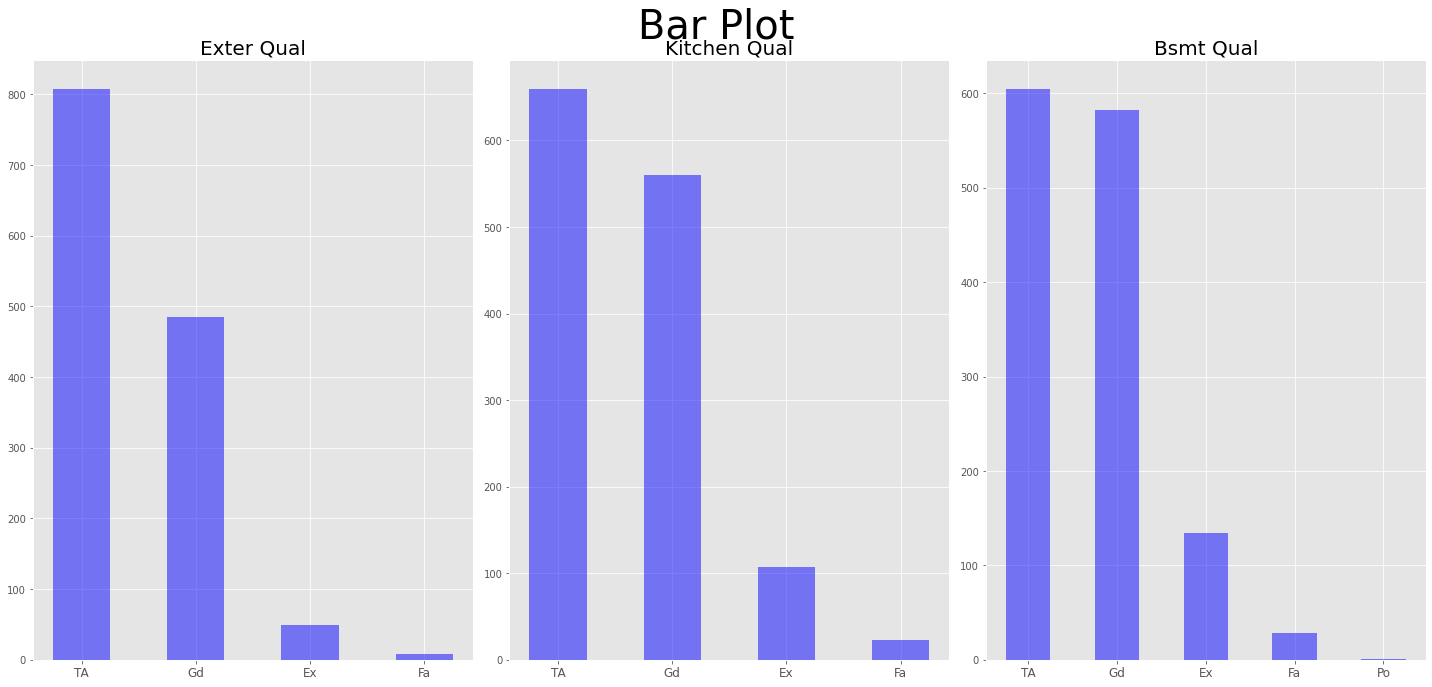

In [10]:
# 히스토그램
feature = categorical_feature

plt.figure(figsize=(20,10))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.title(feature[i], fontsize=20)
    temp = train[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

각 요소가 특정 값에 몰려있음

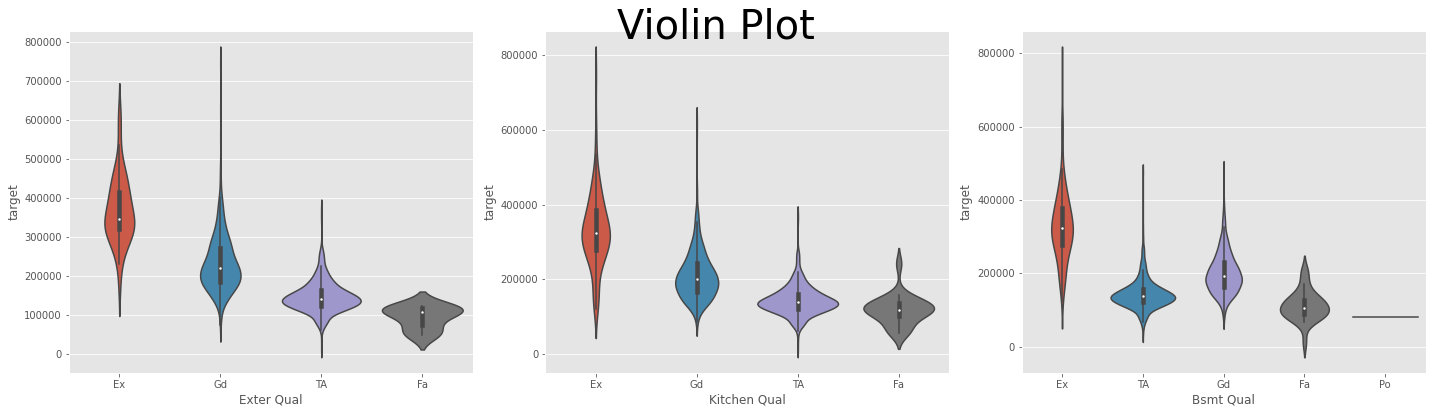

In [11]:
#바이올린 플롯(범주형 변수 분포)
feature = categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel("target")
    sns.violinplot(x= train[feature[i]], y= train["target"])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ex 해당 값들이 상대적으로 높은 집값 분포

exter qual(외관 재료 품질), kitchenQual(부억 품질), BsmtQual(지하실 높이)

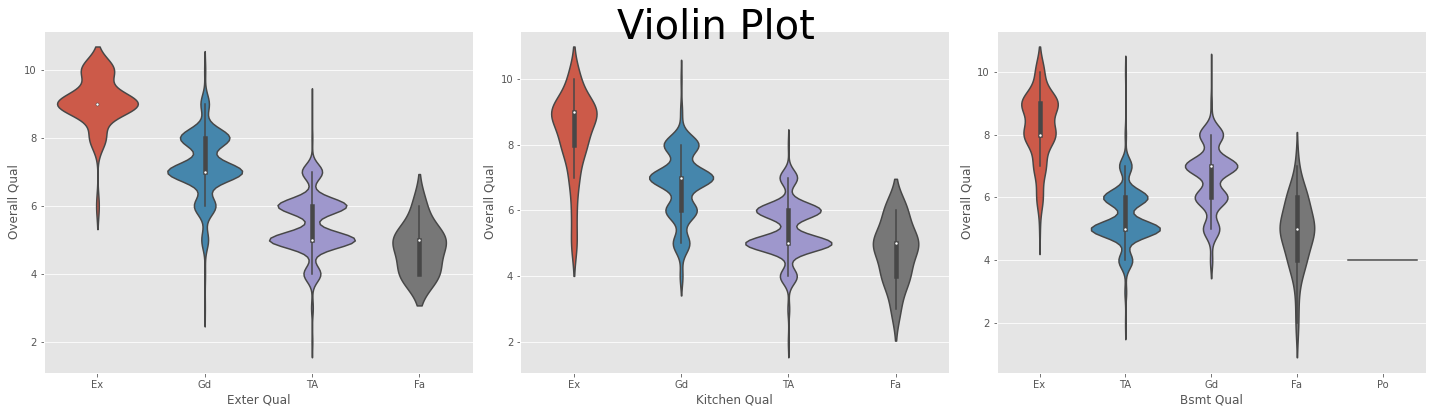

In [12]:
#바이올린 플롯(범주형 변수 분포)
feature = categorical_feature

plt.figure(figsize=(20,6))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(feature)):
    plt.subplot(1,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel('overall qual')
    sns.violinplot(x= train[feature[i]], y= train['Overall Qual'])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ex 해당 값들이 Overall Qual 또한 높다

ex, gd, ta, fa, po 순으로 target과 over Qual이 높다
위 순서로 label encoding 실시할 것

##### 상관계수

In [13]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

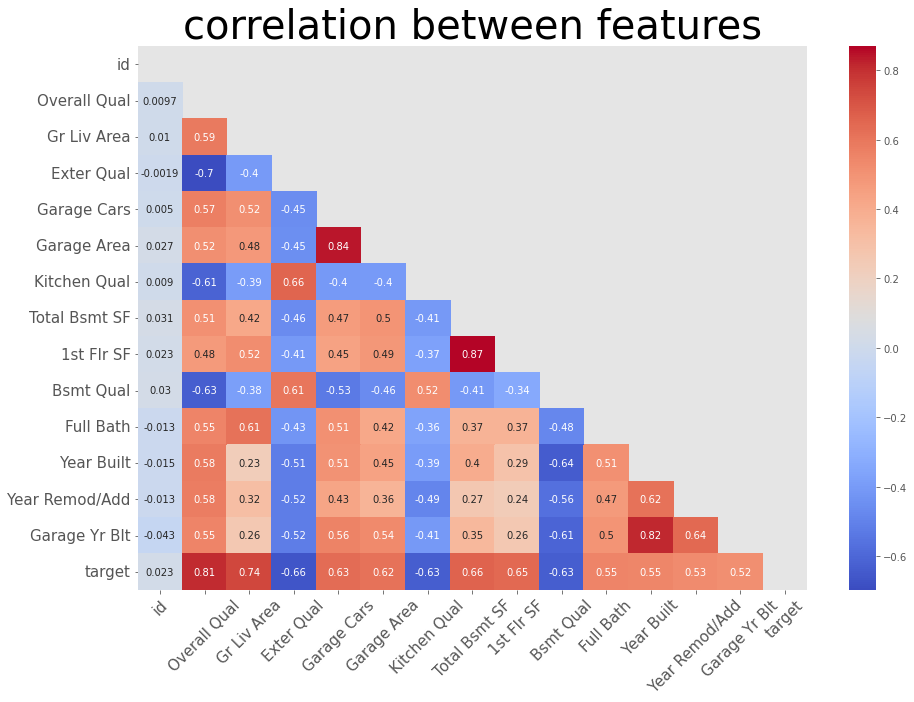

In [14]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

- Overall Qual은 corr이 0.81로 매우 높은 상관관계를 보임(전반적 재료와 마감 품질)
- Gr Liv Area은 corr이 0.74로 두번째로 높은 상관관계를 보임(지상층 생활 면적)

In [18]:
train.corr().loc["target"].abs().sort_values(ascending=False)

target            1.000000
Overall Qual      0.810607
Gr Liv Area       0.742061
Total Bsmt SF     0.664047
1st Flr SF        0.646843
Garage Cars       0.634497
Garage Area       0.617151
Full Bath         0.554453
Year Built        0.546037
Year Remod/Add    0.529477
Garage Yr Blt     0.517973
id                0.022934
Name: target, dtype: float64

- 0.81: Overall Qual(전반적 재료와 마감 품질)
- 0.74: Gr Liv Area(지상층 생활 면적)
- 0.63: Garage Cars(차고 자리 개수)
- 0.65: 1st Flr Sf(1층 면적)
- 0.66 Total Bsmt Sf(지하실 면적)

품질과 면적, 차고 자리 개수가 상관계수가 높다
위 변수들을 자세히 살펴볼 것

##### 산점도

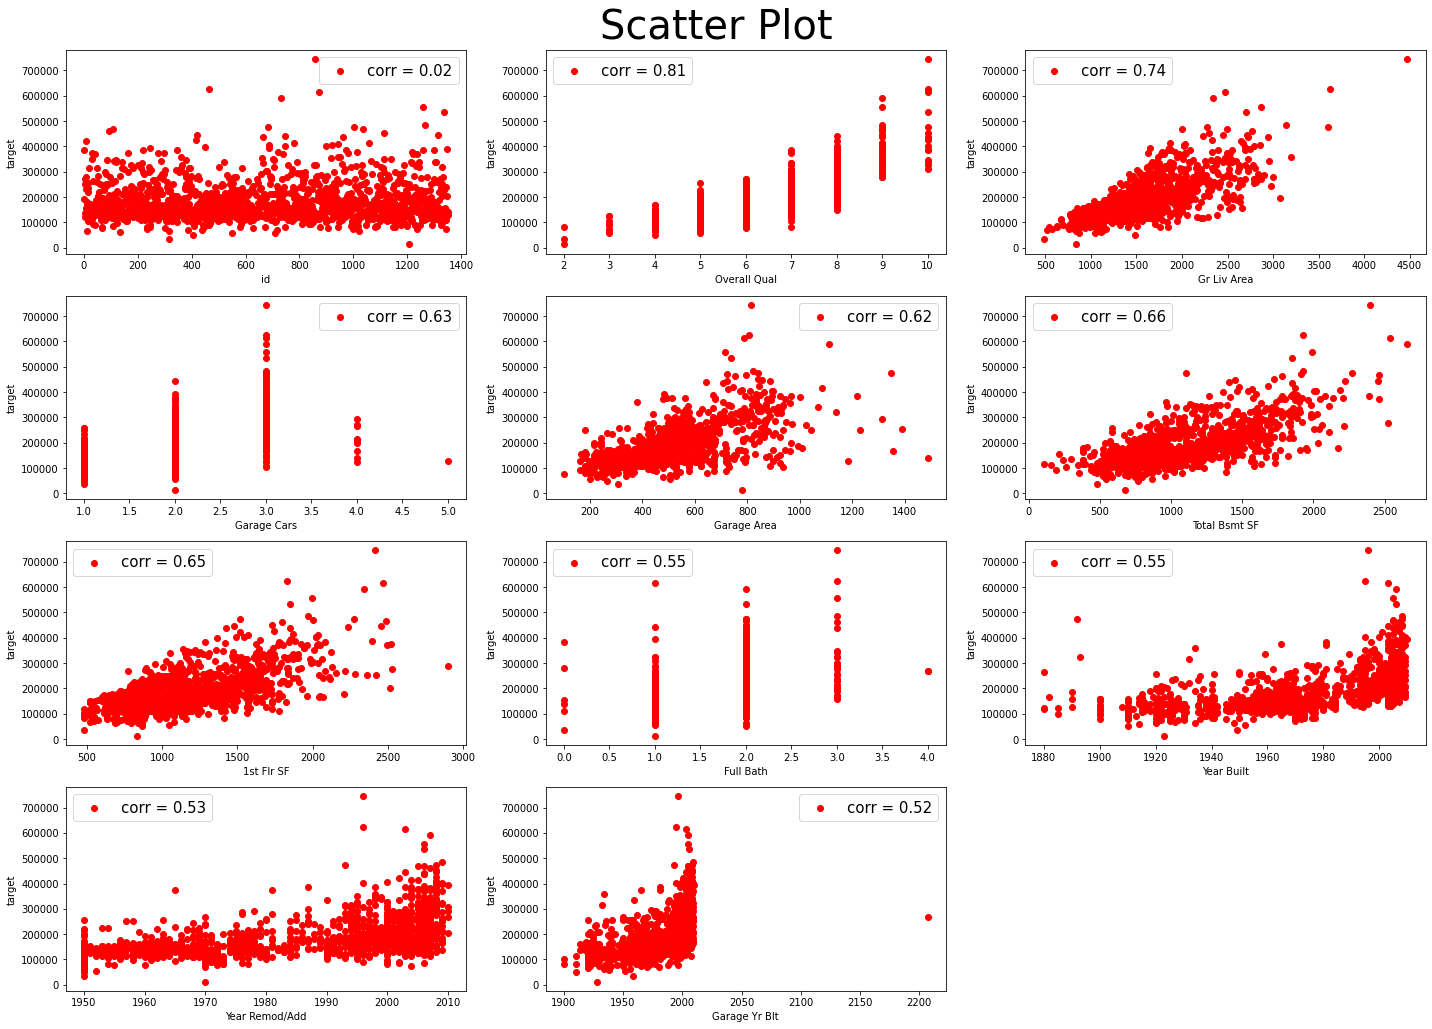

In [58]:
target = "target"
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(feature[:-1])):
    plt.subplot(4,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = train[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(train[feature[i]], train[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### 타겟 변수 

In [33]:
from scipy import stats
from scipy.stats import norm

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


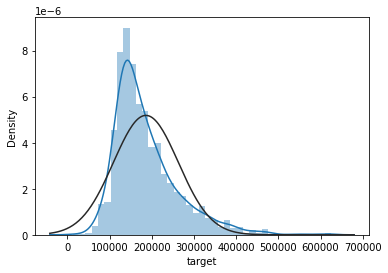

In [34]:
sns.distplot(train['target'],fit = norm)

((array([-3.28270995, -3.0238726 , -2.87983028, ...,  2.87983028,
          3.0238726 ,  3.28270995]),
  array([ 12789,  35311,  50000, ..., 591587, 615000, 625000])),
 (72514.33265581123, 185931.91543026705, 0.9404354434117466))

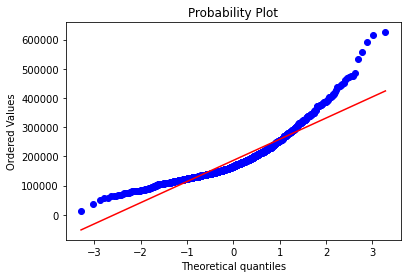

In [35]:
stats.probplot(train['target'], plot=plt)

target은 20을 중심으로 치우쳐 정규성을 띄지 않지 않는다. qq플롯을 그려보니 역시나 정규성을 띄지 않았고 로그 변환을 필요함

### 데이터 전처리

##### 이상치 처리

In [7]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    for c in column:
      # 4분위수 기준 지정하기
      q25, q75 = np.quantile(data[c], 0.25), np.quantile(data[c], 0.75)          
    
      # IQR 계산하기     
      iqr = q75 - q25    
    
      # outlier cutoff 계산하기     
      cut_off = iqr * 1.5          
    
      # lower와 upper bound 값 구하기     
      lower, upper = q25 - cut_off, q75 + cut_off     
    
      print('--------------')
      print(c)
      print('IQR은',iqr, '이다.')     
      print('lower bound 값은', lower, '이다.')     
      print('upper bound 값은', upper, '이다.')    
    
      # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
      data1 = data[data[c] > upper]     
      data2 = data[data[c] < lower]    
    
      # 이상치 총 개수 구하기
      print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

outlier_iqr(train, ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area'])

--------------
Gr Liv Area
IQR은 629.75 이다.
lower bound 값은 199.125 이다.
upper bound 값은 2718.125 이다.
총 이상치 개수는 28 이다.
--------------
Total Bsmt SF
IQR은 490.5 이다.
lower bound 값은 80.25 이다.
upper bound 값은 2042.25 이다.
총 이상치 개수는 19 이다.
--------------
1st Flr SF
IQR은 506.25 이다.
lower bound 값은 126.375 이다.
upper bound 값은 2151.375 이다.
총 이상치 개수는 18 이다.
--------------
Garage Area
IQR은 220.5 이다.
lower bound 값은 36.75 이다.
upper bound 값은 918.75 이다.
총 이상치 개수는 36 이다.


In [14]:
def make_outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    for c in column:
      # 4분위수 기준 지정하기
      q25, q75 = np.quantile(data[c], 0.25), np.quantile(data[c], 0.75)          
    
      # IQR 계산하기     
      iqr = q75 - q25    
    
      # outlier cutoff 계산하기     
      cut_off = iqr * 1.5          
    
      # lower와 upper bound 값 구하기     
      lower, upper = q25 - cut_off, q75 + cut_off  

      train = data[(data[c] < upper) & (data[c] > lower)] 
      return train

# train = make_outlier_iqr(train, ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area'])
# test = make_outlier_iqr(test, ['Gr Liv Area', 'Total Bsmt SF', '1st Flr SF', 'Garage Area'])

이상치 처리 하지 않는 것이 더 높은 예측률을 가져옴

##### 새로운 특성 변수 선언

In [19]:
train.columns

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Exter Qual', 'Garage Cars',
       'Garage Area', 'Kitchen Qual', 'Total Bsmt SF', '1st Flr SF',
       'Bsmt Qual', 'Full Bath', 'Year Built', 'Year Remod/Add',
       'Garage Yr Blt', 'target'],
      dtype='object')

전반적 재료와 마감 품질 / 외관 재료 품질 / 부억 품질 / 지하실 높이

In [11]:
train[[ 'Overall Qual','Exter Qual', 'Kitchen Qual', 'Bsmt Qual']]

,Overall Qual,Exter Qual,Kitchen Qual,Bsmt Qual
0,10,Ex,Ex,Ex
1,7,Gd,Gd,Ex
2,5,TA,TA,TA
3,5,TA,Gd,TA
4,7,Gd,Gd,Gd
...,...,...,...,...
1344,6,TA,TA,TA
1345,6,Gd,TA,Ex
1347,5,TA,TA,TA
1348,5,TA,TA,Gd


품질 변수(위에서 확인 분포에 따라 인코딩)

In [59]:
qual_cols = train.dtypes[train.dtypes == np.object].index
def label_encoder(data, qual_cols):
  mapping={'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
  for col in qual_cols :
    data[col] = data[col].map(mapping)

  return data

In [60]:
label_encoder(train, qual_cols)
label_encoder(test, qual_cols)

지상층 생활 면적 / 차고 자리 개수 / 차고 면적 / 지하실 면적 / 1층 면적 

In [47]:
train[['Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF']]

,Gr Liv Area,Garage Cars,Garage Area,Total Bsmt SF,1st Flr SF
0,2392,3,968,2392,2392
1,1352,2,466,1352,1352
2,900,1,288,864,900
3,1174,2,576,680,680
4,1958,3,936,1026,1026
...,...,...,...,...,...
1345,1756,2,422,872,888
1346,2748,3,850,1850,1850
1347,1214,1,318,1214,1214
1348,894,2,440,864,894


In [62]:
def area_feature(data):
  data['multiple floors'] = (data['Gr Liv Area']//data['1st Flr SF']) #집 층수
  data['2st Flr SF'] = data['Gr Liv Area'] - data['1st Flr SF'] #2층 면적
  data['Total Area'] = data['Gr Liv Area'] + data['Total Bsmt SF'] + data['1st Flr SF'] #전체 면적
  data['Car Area'] = data['Garage Area'] / data['Garage Cars'] #차고 한자리 면적

  return data

In [63]:
area_feature(train)
area_feature(test)

완공 연도 / 리모델링 연도 / 차고 완공 연도

In [26]:
train[['Year Built', 'Year Remod/Add','Garage Yr Blt']]

,Year Built,Year Remod/Add,Garage Yr Blt
0,2003,2003,2003
1,2006,2007,2006
2,1967,1967,1967
3,1900,2006,2000
4,2005,2005,2005
...,...,...,...
1345,1996,1997,1996
1346,2006,2006,2006
1347,1967,1967,1967
1348,1974,1974,1974


In [64]:
def year_feature(data):
  data['Remote Gap'] = data['Year Remod/Add'] - data['Year Built'] #리모델링
  data['Garage Gap'] = data['Garage Yr Blt'] - data['Year Built'] #차고 리모델링 

  return data

In [65]:
year_feature(train)
year_feature(test)

### 모델 학습

In [41]:
X = train.drop(['id', 'target'], axis=1)
y = np.log1p(train.target)

In [42]:
target = test[X.columns]

In [22]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
def NMAE(true, pred) -> float:
    mae = np.mean(np.abs(true - pred))
    score = mae / np.mean(np.abs(true))
    return score

In [43]:
from sklearn.metrics import make_scorer
nmae_score = make_scorer(NMAE, greater_is_better=False)

In [44]:
target = test[X.columns]

In [28]:
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

In [46]:
rf_pred = np.zeros(target.shape[0])
rf_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    rf = RandomForestRegressor(random_state = 42, criterion = 'mae')
    rf.fit(tr_x, tr_y)
    
    val_pred = np.expm1(rf.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    rf_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    fold_pred = rf.predict(target) / 10
    rf_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(rf_val)} & std = {np.std(rf_val)}')

1 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


1 FOLD NMAE = 0.09469157038604166

2 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


2 FOLD NMAE = 0.10021574983588401

3 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


3 FOLD NMAE = 0.11006885971075489

4 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


4 FOLD NMAE = 0.10143641285360264

5 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


5 FOLD NMAE = 0.10135606332001323

6 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


6 FOLD NMAE = 0.09043897610207524

7 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


7 FOLD NMAE = 0.10097381485634817

8 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


8 FOLD NMAE = 0.09346989295419478

9 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


9 FOLD NMAE = 0.09315943903123121

10 FOLD Training.....


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


10 FOLD NMAE = 0.08837633342838387

10FOLD Mean of NMAE = 0.09741871124785298 & std = 0.006195048607908791


In [47]:
gbr_pred = np.zeros(target.shape[0])
gbr_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    gbr = GradientBoostingRegressor(random_state = 42, max_depth = 4, learning_rate = 0.05, n_estimators = 1000)
    gbr.fit(tr_x, tr_y)
    
    val_pred = np.expm1(gbr.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    gbr_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    fold_pred = gbr.predict(target) / 10
    gbr_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(gbr_val)} & std = {np.std(gbr_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.0939576692886739

2 FOLD Training.....
2 FOLD NMAE = 0.09815778253495935

3 FOLD Training.....
3 FOLD NMAE = 0.10213989674782951

4 FOLD Training.....
4 FOLD NMAE = 0.09159403020925708

5 FOLD Training.....
5 FOLD NMAE = 0.10073224347176055

6 FOLD Training.....
6 FOLD NMAE = 0.09758722025790731

7 FOLD Training.....
7 FOLD NMAE = 0.09866952759140639

8 FOLD Training.....
8 FOLD NMAE = 0.09329353115020037

9 FOLD Training.....
9 FOLD NMAE = 0.08786891801933719

10 FOLD Training.....
10 FOLD NMAE = 0.09298525355391461

10FOLD Mean of NMAE = 0.09569860728252463 & std = 0.00423789575499289


In [48]:
cb_pred = np.zeros(target.shape[0])
cb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    tr_data = Pool(data = tr_x, label = tr_y)
    val_data = Pool(data = val_x, label = val_y)
    
    cb = CatBoostRegressor(depth = 4, random_state = 42, loss_function = 'MAE', n_estimators = 3000, learning_rate = 0.03, verbose = 0)
    cb.fit(tr_data, eval_set = val_data, early_stopping_rounds = 750, verbose = 1000)
    
    val_pred = np.expm1(cb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    cb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = cb.predict(target) / 10
    cb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(cb_val)} & std = {np.std(cb_val)}')

1 FOLD Training.....
0:	learn: 0.2778742	test: 179550.6352801	best: 179550.6352801 (0)	total: 1.5ms	remaining: 4.51s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 179550.6168
bestIteration = 109

Shrink model to first 110 iterations.
1 FOLD NMAE = 0.09814806406665967

2 FOLD Training.....
0:	learn: 0.2760008	test: 176434.2000432	best: 176434.2000432 (0)	total: 1.52ms	remaining: 4.56s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 176434.1917
bestIteration = 69

Shrink model to first 70 iterations.
2 FOLD NMAE = 0.12359063755931449

3 FOLD Training.....
0:	learn: 0.2775601	test: 184871.4354054	best: 184871.4354054 (0)	total: 1.36ms	remaining: 4.09s
Stopped by overfitting detector  (750 iterations wait)

bestTest = 184871.3788
bestIteration = 184

Shrink model to first 185 iterations.
3 FOLD NMAE = 0.11064972749942066

4 FOLD Training.....
0:	learn: 0.2780687	test: 183209.9823733	best: 183209.9823733 (0)	total: 1.42ms	remaining: 4.26s
1000:	learn:

In [49]:
from ngboost import NGBRegressor

ngb_pred = np.zeros(target.shape[0])
ngb_val = []
for n, (tr_idx, val_idx) in enumerate(kf.split(X, y)) :
    print(f'{n + 1} FOLD Training.....')
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], np.expm1(y.iloc[val_idx])
    
    ngb = NGBRegressor(random_state = 42, n_estimators = 1000, verbose = 0, learning_rate = 0.03)
    ngb.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    val_pred = np.expm1(ngb.predict(val_x))
    val_nmae = NMAE(val_y, val_pred)
    ngb_val.append(val_nmae)
    print(f'{n + 1} FOLD NMAE = {val_nmae}\n')
    
    target_data = Pool(data = target, label = None)
    fold_pred = ngb.predict(target) / 10
    ngb_pred += fold_pred
print(f'10FOLD Mean of NMAE = {np.mean(ngb_val)} & std = {np.std(ngb_val)}')

1 FOLD Training.....
1 FOLD NMAE = 0.08402014280563148

2 FOLD Training.....
2 FOLD NMAE = 0.09656024458932422

3 FOLD Training.....
3 FOLD NMAE = 0.10206267694450467

4 FOLD Training.....
4 FOLD NMAE = 0.09441085380847786

5 FOLD Training.....
5 FOLD NMAE = 0.09444628334977827

6 FOLD Training.....
6 FOLD NMAE = 0.09371158003985605

7 FOLD Training.....
7 FOLD NMAE = 0.09719878879185864

8 FOLD Training.....
8 FOLD NMAE = 0.08880118792718729

9 FOLD Training.....
9 FOLD NMAE = 0.09145816705896977

10 FOLD Training.....
10 FOLD NMAE = 0.08880195203943188

10FOLD Mean of NMAE = 0.09314718773550201 & std = 0.004848483718249185


In [50]:
(ngb_pred + cb_pred + rf_pred + gbr_pred) / 4

array([12.69517516, 11.79746254, 12.06994953, ..., 11.33384648,
       12.18605407, 11.82883442])

In [34]:
submission = pd.read_csv('/content/drive/MyDrive/dacon/집값예측경진대회/sample_submission.csv')

In [51]:
submission['target'] = np.expm1((ngb_pred + cb_pred + rf_pred + gbr_pred) / 4)

In [53]:
submission.to_csv("submission.csv", index=False)